# Getting started with Neural Networks

Please note that this notebook uses material presented in the [Udacity Nanodegree Artificial Intelligence course](https://www.udacity.com/ai)

## Machine learning

Neural networks are just one example of group of computer algorithms called machine learning. Machine learning allows computers to learn from data - to find out patterns and search for hidden insights. They are extremely usefull in cases, where we ourselves cannot create an exact algorithm. Instead the computers are learning themselves from examples. 

When designing machine learning solutions, you typically go through series of steps:
1. __Acquire data__
  - You need to get the training data, they can be retreived from the Internet (there are many public sources of free datasets), or prepared specifically for your task. It is very important that you have rights to use the data for your task (yes GDPR, but also many other regulations), the data should be withouth bias and accuratelly representing your specific problem. Unfortunatelly, neural networks are models requiring large amounts of data, which is hard to get.
2. __Analyse data__
  - Typically you are doing analysis of how the data are structured, what are the relations, and decide which features you should use. Here you can use visualisations, statistics and other methods to learn more about the data.
3. __Label the data__
  - In case your data is not labeled, you need to label them, which is very cumbersome task. Unfortunatelly for most of the problems out there, there are no labeled data. Though there are specific machine learning algorithms, which also work with unlabeled data.
4. __Preprocess the data__
  - This can include any preprocessing you can think about - encoding into numbers, scaling, denoising, data augumentation, creating artificial features etc. Very often you are spending most of the time in machine learning right here - preprocessing your data.
5. __Split the data__
  - While training the machine learning model, you iterate through the data and adjust it to match the expected results. This brings in one large danger - overfitting. It means that your model is so adjusted to match the training data, that it cannot match anything else. It has learned the training data completely. To avoid this, you should split your data into multiple sets:
    - training set - used to train the model
    - validation set - used to test the model while training, and to pick best model
    - testing set - used to assess the model performance on completely unseen data
6. __Define your machine learning model__
  - Here you can e.g. design the neural network layers and decide on their parameters (so called hyperparameters). You can also choose different machine learning models, for many tasks there are better models than neural networks. You may need also to compile your model (if it is a neural network), and decide on the optimizer you would like to use - this is the function that optimizes the model to match the data.
7. __Train the model__
  - This is task which is typically left to computers - just iterate, iterate, iterate, iterate ... they do this best
8. __Assess the model performance__
  - Once you have your model, you want to see how good it is - that's why you have the testing data set prepared.
9. __Optimize the model__
  - When you are not satisfied with your model performance, you typically have to go again through the steps 1. to 8. You may get better data for the training, have different preprocessing, change the model completely or just the hyperparameters (there are methods to do automatized hyperparameter tunning). You may also take the model and use different frameworks or skip some weights to have better performance. But in lot of cases, optimization of the model requires lot of iterations, try and errors.
10. __Deploy your model__
  - If you want to use your model, you need to deploy it. This depends on your needs, but here are some examples what you might do
      - it may be packaged into an Android application to run on a mobile phone
      - deployed as a Rest service on your server, called from frontend application,
      - executed inside a docker container on a Kubernetes cluster, automatically scaled for best performance (see for example https://www.kubeflow.org/)
      - It may be served directly by your cloud infrastructure
11. __Monitor and improve your model__
  - In production, you should monitor how your model is performing (speed, accuracy, logging). You should use the production data to further improve the model. For example if it is a chatbot, you should improve it based on the questions which it cannot answer. 
  
Now that's a lot of things you are typically doing for machine learning and many of them are out of scope for our lecture. In our learning we will showcase at least some of them

Lets start with neural nets!!!

## Neural network quickstart

Neural networks in a simplified view can be seen as approximators of a function. 

As an example, we can have a set of points in 2D space specified by their position [x, y]. Lets say, that we split the points into two groups - some of them will be red (or 0) and some of them blue (or 1). This set of points we will call our input data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline

input_data = np.loadtxt(open("data.csv", "rb"), delimiter=",")

How does the data look like?

In [2]:
print(input_data[:5])

[[ 0.78051  -0.063669  1.      ]
 [ 0.28774   0.29139   1.      ]
 [ 0.40714   0.17878   1.      ]
 [ 0.2923    0.4217    1.      ]
 [ 0.50922   0.35256   1.      ]]


Your turn now, print the last 5 rows in the data (can be done just by using -n from the example above)

In [3]:
print(input_data[-5:])

[[ 0.77029  0.7014   0.     ]
 [ 0.73156  0.71782  0.     ]
 [ 0.44556  0.57991  0.     ]
 [ 0.85275  0.85987  0.     ]
 [ 0.51912  0.62359  0.     ]]


We can actually visualise the data in a graph, with their X and Y positions, and the value will be used to determine the colour for the point:

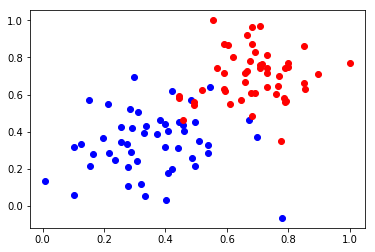

In [4]:
def show_points():    
    c = ["ro", "bo"]
    for i in range(0, len(input_data)):
        plt.plot(input_data[i, 0], input_data[i, 1], c[int(input_data[i, 2])])
        
show_points()
plt.show()

We have a new point, which is not in the original set of points. And we would like to know, if this point should be blue or red?

This is actually a classification task - based on some input data, we would like to predict into which group the new data belongs.

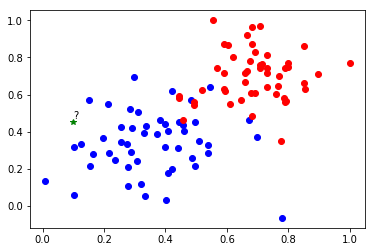

In [5]:
def sample_point(point):
    plt.plot(point[0], point[1], 'g*')
    plt.annotate('?', xy=point, xytext=(point[0], point[1] + 0.02))

# Change the point here, to show different points on the plot
sample_point([0.1, 0.45])
show_points()
plt.show()

One way how we can actually solve the task is to split the data by a line, for example like this:

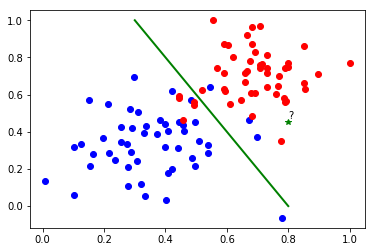

In [6]:
plt.plot([0.8, 0.3], [0, 1], color='g', linestyle='-', linewidth=2)
show_points()
sample_point([0.8, 0.45])
plt.show()

Based on the line above, when we have a new point we can say:
- if the point is left of our line, it should be blue
- if the point is right of our line, it should be red

We can already see above that the line we used is not the best approximation - some red points are actually left of the line, and some of the white points are to the right. This actually happens almost always with real data - they cannot be simply split into groups, some of the data will be classified as errors. Therefore we would like to find a line, that matches the input data to have the least errors, so we can also do predictions with least errors possible.

Now a little math. Any line (even our sample line) can be expressed as:
$$
0 = a*x + b*y + c
$$

Now rewrite the line expression a little. We use w0, w1 instead of a, b, because these are so called weights. Instead of c we will use b, as this is called bias. And instead of (x, y) we will use just (x0, x1) as these are our data:

$$
0 = W0*X0 + W1*X1 + b
$$

But only the points that are on the line result in 0 on the left side. Lets have this as a generic function, where we would like to calculate the value any point (X0, X1)
$$
F(X) = W0*X0 + W1*X1 + b
$$

Now it is your turn, please write the function for generating the line outputs based on the expression above.

In [7]:
# Function for the line
def line_function(X, W, b):
    # Here write the expression of the line function - X, W are matrixes with two values, b is a simple number
    return X[0] * W[0] + X[1] * W[1] + b

sample_X = [0.2, 0.2]
sample_W = [0.2, 0.1]
sample_bias = +1

# What is the value of the line function for point 0.2, 0.2 with weights 0.1, 0.1 and bias 1
# You can change the weights above or update the inputs / outputs
line_function(sample_X, sample_W, sample_bias)

1.06

Now when we have a point, to tell whether it is red or blue in our dataset, we can actually use a different expressions:
$$
Red point: a*x + b*y + c < 0
$$
$$
Blue point: a*x + b*y + c > 0
$$

This question on whether the point is left or right of the line (lower or greater than 0) - this is called "Activation function". Our "equation" will be active when the the result of the equation is above 0, and non active when the result of the equation is bellow 0.

Now again your turn - write the activation function for us - just take the value and compare it with 0.

In [8]:
def activation(value):
    if value >= 0:
        return 1
    return 0

print("Activation for negative value: {}".format(activation(-2)))
print("Activation for positive value: {}".format(activation(+2)))

Activation for negative value: 0
Activation for positive value: 1


With f as our activation function, we can have the prediction written as:
$$
output = f(w1*x1 + w2*x2 + b)
$$

And this is actually a very simple neuron called perceptron. It can be visualised for example like this:

![Perceptron](images/perceptron.png)

Lets do another rewrite of the expression, the last one - we are going to write the equation with matrixes:

\begin{equation*}
\mathbf{output} = \mathbf{f} ( \begin{vmatrix}
\mathbf{w}_1 & \mathbf{w}_2 & \mathbf{b} 
\end{vmatrix} \times 
\begin{vmatrix}
\mathbf{x}_1 \\
\mathbf{x}_2 \\
\mathbf{1}
\end{vmatrix}
) 
\end{equation*}

Or just with matrices:
\begin{equation*}
\mathbf{output} = \mathbf{f} ( \mathbf{W} \times \mathbf{X} )
\end{equation*}

Here you can see that neural networks are actually matrix operations. That's why we need special processors for neural nets and their training - like graphic cards, because they are specialized on this task (graphic operations are also operations with matrices)

As we have already the line function and the activation function, we can now write the code for the perceptron function by combining these two:

In [9]:
def perceptron(X, W, b):
    return activation(line_function(X, W, b))

print("Active perceptron: {}".format(perceptron([0, 1], [1, 2], 2)))
print("Not active perceptron: {}".format(perceptron([0, 1], [1, 2], -12)))

Active perceptron: 1
Not active perceptron: 0


As we have our perceptron, we want to have some predictions from it. So the question is how to actualy choose the weights and bias for our perceptron? If we have those, we can put set the input data and make a prediction.

Neural networks are algorithms trained on data. The idea is that you take a point, run it through the perceptron, see if the prediction matches and if not we adjust the weights and bias. How much we adjust them? Well we will adjust them based on a constant called learning rate. As our initial weights we can take anything, so lets make them random.

In reality the training is little more complicated and based on algorithms called Gradient Descent. This one is also calculating predictions from the training data, but then it calculates also an error function - this one tells us how far are we actually from the expected value. It then takes the derivatives of this error function which tell in which direction and how much the weights and biases should be adjusted. For simplicity and demonstration purposes, in our algorithm bellow we just adjust bby learning rate and the error, not by derivatives.

Lets first start by separating our input and output data for the calculations and also by calculating the minimum and maximum values.

In [10]:
X = input_data[:, 0:2]
y = input_data[:, 2]

x_min, x_max = min(X[:, 0]), max(X[:, 0])
y_min, y_max = min(X[:, 1]), max(X[:, 1])

And this is our training itself. In its essence it is quite simple:
- For specified number of epochs:
    - For each point calculate if the prediction is correct
        - if it isn't correct, adjust the weights
        
You don't need to study the algorithm to deep, your task here will be quite simple - try changing the random seed value on the first line, so you can see how the algorithm started from a different lines and iterated until it found one quite matching (though a different one each time).

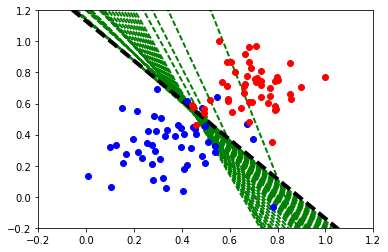

In [11]:
np.random.seed(9)

# We define single step that goes through all the values
# and adjust the weights and biases for points which are wrongly classified
def perceptronStep(X, y, W, b, learn_rate = 0.01):

    for i in range(X.shape[0]):
        outcome = perceptron(X[i], W, b)
        
        if outcome != y[i]:
            if outcome == 0:
                W = W + X[i][:, None] * learn_rate
                b = b + learn_rate
            else:
                W = W - X[i][:, None] * learn_rate
                b = b - learn_rate

    return W, b

# We iterate through the single adjust step specified number of times
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 40):
    # initialize random weights and bias
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines    

# Get all lines that were calculated so far and show them on a graph
boundary_lines = trainPerceptronAlgorithm(X, y)

def plot_line(a, b, color = 'g', linewidth = 2):
    plt.plot([-0.2, 1.2], [a*-0.2 + b, a*1.2 + b], color=color, linestyle='--', linewidth=linewidth)
    
for i in range(len(boundary_lines)):
    color = 'g'
    if i == len(boundary_lines) - 1:
        plot_line(boundary_lines[i][0], boundary_lines[i][1], 'black', 4)
    else:
        plot_line(boundary_lines[i][0], boundary_lines[i][1])
    
show_points()
axes = plt.gca()
axes.set_xlim([-0.2,1.2])
axes.set_ylim([-0.2,1.2])
plt.show()


## Multilayer neural network

Now we have our single perceptron with two inputs. We can now do multiple things.

We can add more inputs:

![Perceptron](images/more_inputs.png)

It will allow us to actually use more features for our perceptron - e.g. we might want to predict what is the probability of having grade A on a test based on the following features:
- hours of study
- previous attempts
- number of lectures visited
- points from excercises
- etc.

We can also add more neurons - so you create what is called a fully connected layer in neural network:

![FullyConnected](images/fully_connected_layer.png)

We can now predict multiple marks.

And last but not least, we can actually add more layers:

![FullyConnected](images/multi_layer.png)

This will actually allow us to do simulate non linear functions and actually better match our training data.

## Activation Functions

So far we have left out the magical activation function and in our simulated network it was simple:
- if higher than 0, then return 1
- if lower than 0, then return 0

But in real neural networks we need to use continous functions, not just true false. There are three most common activation functions used in neural networks:

### ReLU

The ReLU (Rectifier) function returns either the maximum from (value, 0) - so for values less than 0, it returns 0. This function is commonly used in convolutional neural networks.

We would like you to actually code this function - it is just a simple check whether the value is greater than 0, if so return the value, otherwise return 0.

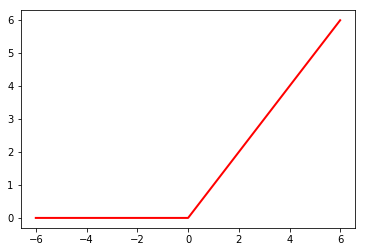

In [12]:
def relu(x):
    if (x > 0):
        return x
    return 0
    
x = np.arange(-6, 6, .01)
S = [relu(i) for i in x]
plt.plot(x, S, color='red', lw=2)
plt.show()

### Leaky ReLU

Very similar as standard ReLU, but instead of just zeroing the negative values, it multiplies them with a coeficient to make them smaller. Again your turn to code the function:

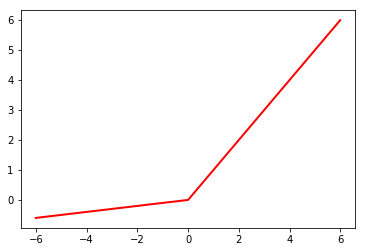

In [13]:
# Craete the leaky relu function here
def leaky_relu(x, a):
    if (x > 0):
        return x
    else:
        return x*a

coeficient = 0.1
x = np.arange(-6, 6, .01)
S = [leaky_relu(i, coeficient) for i in x]
plt.plot(x, S, color='red', lw=2)
plt.show()

### Sigmoid

The sigmoid function is a continuous equivalent of our true / false function, used when you need this kind of outcome from the neural network or its layer. It gives you a probability of the outcome being true or false.

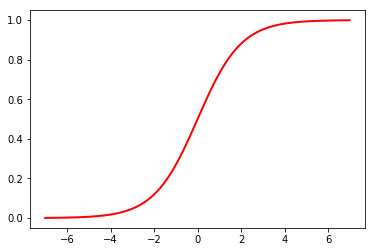

In [14]:
def sigmoid(x):
    return 1. / (1. + np.exp(-(x)))

x = np.arange(-7, 7, .01)
S = sigmoid(x)
plt.plot(x, S, color='red', lw=2)
plt.show()

### Softmax function

Another very common function, which is typically used in the output layers of the neural network - especially for classification tasks. Imagine that you have 3 outcomes from the neural networks (three perceptrons in the final layers). But the outcomes are real numbers, of any size (typically larger than 0). What softmax does is that it puts all the numbers into interval (0, 1), and that all the values together sum as 1. This allows you to treat the values as probabilities of the outcome. You can find the exact mathematical equation on the [internet](https://en.wikipedia.org/wiki/Softmax_function).

So very simply put - if you have multiple classes as outcomes of your neural network, softmax is very likely your last activation function, because it gives you a probability for each output class

\begin{equation*}
\mathbf{softmax} ( \begin{vmatrix}
\mathbf{5} \\
\mathbf{7} \\
\mathbf{8} \\
\end{vmatrix} ) =
\begin{vmatrix}
\mathbf{0.25} \\
\mathbf{0.35} \\
\mathbf{0.4}
\end{vmatrix}
\end{equation*}